#Welcome to the interactive MELD workshop on automated detection of focal cortical dysplasias (FCDs).

##This workshop will work through how to use the MELD Graph algorithm to help identify the lesions in two patients with FCDs.

Link to this notebook:
https://t.ly/HWYqb

We thank the Bonn Group (in particular Lennart Walger and Theodor Ruber) for creating an open dataset of MRI data from patients with FCDs that we have used for this workshop.

---

Spitzer, H. et al. (2023). Robust and Generalisable Segmentation of Subtle Epilepsy-Causing Lesions: A Graph Convolutional Approach. MICCAI 2023. Lecture Notes in Computer Science, vol 14227. Springer, Cham. https://doi.org/10.1007/978-3-031-43993-3_41

Schuch F, Walger L, Schmitz M, David B, Bauer T, Harms A, Fischbach L, Schulte F, Schidlowski M, Reiter J, Bitzer F, von Wrede R, Rácz A, Baumgartner T, Borger V, Schneider M, Flender A, Becker A, Vatter H, Weber B, Specht-Riemenschneider L, Radbruch A, Surges R, Rüber T. An open presurgery MRI dataset of people with epilepsy and focal cortical dysplasia type II. Sci Data. 2023 Jul 20;10(1):475. doi: 10.1038/s41597-023-02386-7. PMID: 37474522; PMCID: PMC10359264.



---



# First - install the necessary dependencies, clone the github repo and download the data

In [1]:
#Installing and downloading
!pip install nibabel
!rm -r meld_workshop
!git clone https://www.github.com/MELDproject/meld_workshop
!pip install matplotlib-surface-plotting
!pip install ipywidgets
#importing packages
import matplotlib_surface_plotting as msp
import numpy as np
import os
import matplotlib.pyplot as plt
import nibabel as nb
from ipywidgets import interact, IntSlider
import matplotlib.image as mpimg



rm: cannot remove 'meld_workshop': No such file or directory
Cloning into 'meld_workshop'...
remote: Enumerating objects: 546, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 546 (delta 23), reused 13 (delta 2), pack-reused 468 (from 1)
Receiving objects: 100% (546/546), 348.56 MiB | 18.63 MiB/s, done.
Resolving deltas: 100% (49/49), done.
Updating files: 100% (310/310), done.
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


# Patient 00 is a 18 year old male with focal epilepsy. Their seizures were not controlled with anti-seizure medication and they were investigated for possible epilepsy surgery. As part of their investigation they had a MRI scan.

Can you find the lesion?

#Load in the T1 and FLAIR MRIs for a patient with FCD

In [6]:
subject='sub_00'

#later on you can try a different subject:
#subject = 'sub_01'

t1 = nb.load(f'./meld_workshop/data/{subject}/mri/T1.mgz')
flair = nb.load(f'./meld_workshop/data/{subject}/mri/FLAIR.mgz')
t1_data=t1.get_fdata()
flair_data=flair.get_fdata()

#clip and convert to integer to speed up viewer
t1_data = np.clip(t1_data,0,255).astype(np.int16)
flair_data = np.clip(flair_data,0,255).astype(np.int16)

Scroll through the MRIs and try to find the lesion.

In [7]:
#define a MRI viewing function
def plot_slice(slice_index):
    """
    Plot a slice from T1-weighted and FLAIR MRI data.

    Parameters:
    slice_index (int): The index of the slice to be plotted.
    """
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    axes[0].imshow(t1_data[:, :, slice_index].T, cmap='gray',vmin=50,vmax=120)
    axes[0].set_title(f'T1 - Slice {slice_index}')
    axes[0].axis('off')

    axes[1].imshow(flair_data[:, :, slice_index].T, cmap='gray',vmin=20,vmax=180)
    axes[1].set_title(f'FLAIR - Slice {slice_index}')
    axes[1].axis('off')

    plt.show()

# Create an interactive slider
slice_slider = IntSlider(min=0, max=t1_data.shape[2]-1, step=1, value=t1_data.shape[2]//2)

# Use the interact function to update the MRI plot with the slider
interact(plot_slice, slice_index=slice_slider)

#scroll through the MRI to try to find the lesion

interactive(children=(IntSlider(value=128, description='slice_index', max=255), Output()), _dom_classes=('widg…

<function __main__.plot_slice(slice_index)>

#Q1. How confident are you about the lesion location?

1.   Absolutely no idea - I can't see a lesion
2.   Everything looks a bit abnormal
3.   One or two areas look suspicious
4.   I think I know where it is
5.   I am very confident I know where the lesion is



Surface-based features were created using FreeSurfer.

# Let's load and view surface based features

Can you see the lesion now?

In [ ]:
#here we've selected 5 key features to view on the surface
features = ['thickness','w-g.pct','gm_FLAIR_0.5']
feature_names_dict = {'thickness':'Cortical thicknes',
                      'w-g.pct':'Grey-white matter\ncontrast',
                      'gm_FLAIR_0.5':'Grey FLAIR',
                      'wm_FLAIR_0.5':'White FLAIR',
                      'pial.K_filtered.sm20':'Folding' }

#if you want to look at more features
#all_features = ['thickness','w-g.pct','gm_FLAIR_0.5','wm_FLAIR_0.5','pial.K_filtered.sm20']


In [ ]:
#choose a hemisphere to look at
hemi='rh' #change to lh to view the left hemisphere

#all data is mapped to the left hemisphere of fsaverage_sym.
#pial and white surfaces are also provided.
surf = nb.freesurfer.read_geometry(f'./meld_workshop/data/fsaverage_sym/surf/{hemi}.inflated') #try changing to .pial


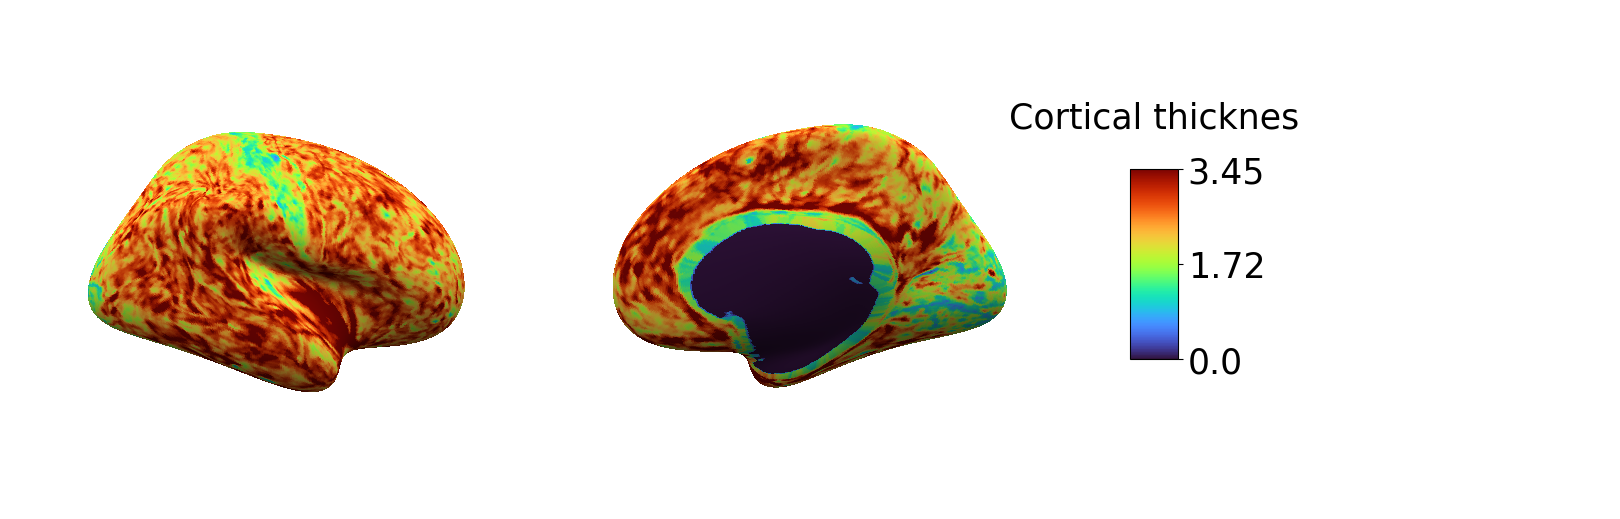

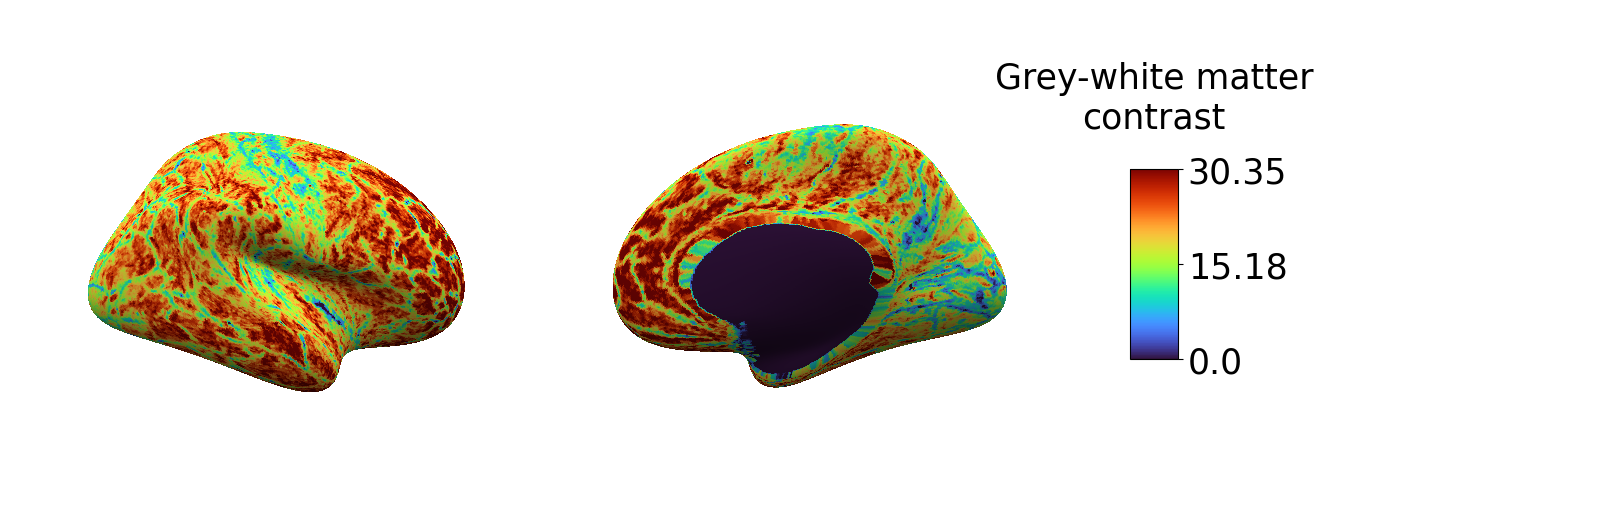

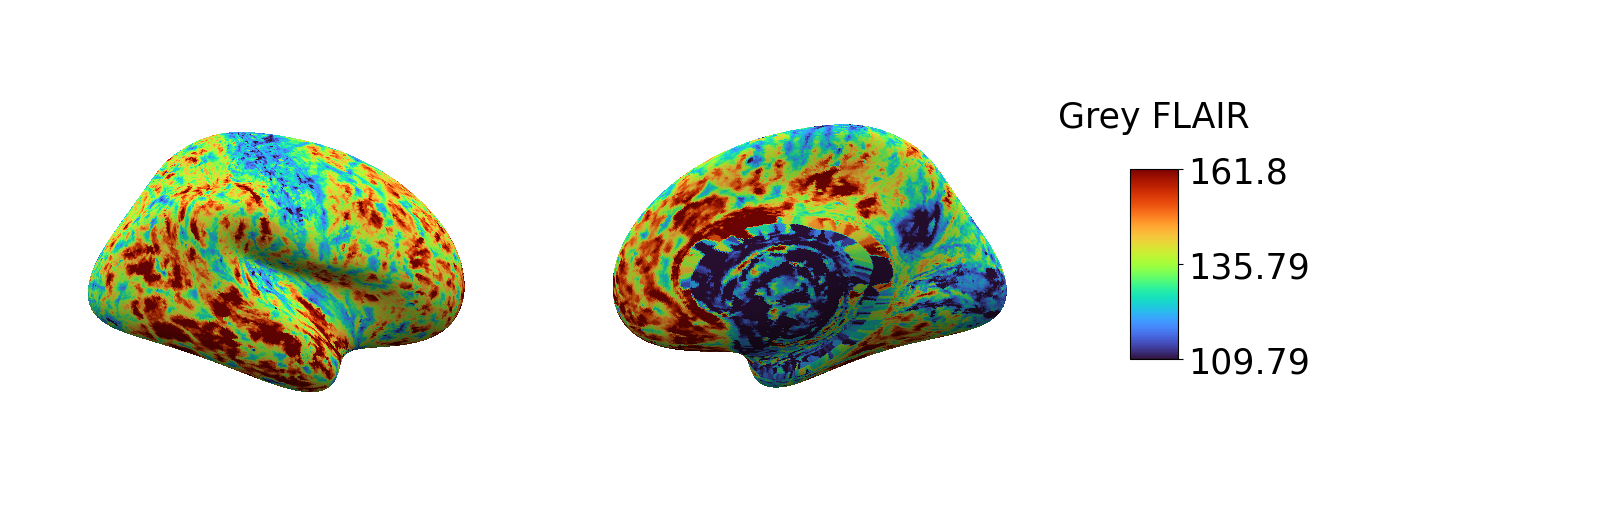

In [ ]:
#load in just the "raw" features on to the cortical surface
surf_folder = f'./meld_workshop/data/{subject}/xhemi/surf_meld'
#loop over the feature names
for feat_i in features:
  feat = '{}.on_lh.{}.mgh'.format(hemi,feat_i)
  #load in the feature using nibabel
  feature = nb.load(os.path.join(surf_folder,
                    feat)).get_fdata().ravel()
  #plot using a matplotlib_surface_plotting
  msp.plot_surf(surf[0],surf[1],
                feature,vmin=np.percentile(feature,5),
                rotate=[270,90],
                cmap_label=feature_names_dict[feat_i],
                vmax = np.percentile(feature,95),cmap='turbo')


#Q2. How confident are you about the lesion location now?

1.   Absolutely no idea - I can't see a lesion
2.   Everything looks a bit abnormal
3.   One or two areas look suspicious
4.   I think I know where it is
5.   I am very confident I know where the lesion is

#Two challenges in identifying abnormal feature values are interregional and intersubject variability.

Cortical thickness varies according to age - we z-score within subjects to remove this source of variance.

Features have stereotyped patterns across individuals - e.g. a thin central sulcus. Here we visualise the average cortical thickness across a large number of healthy controls.

To account for this we z-score each vertex on the cortical surface by the population of healthy controls.



(-0.5, 877.5, 373.5, -0.5)

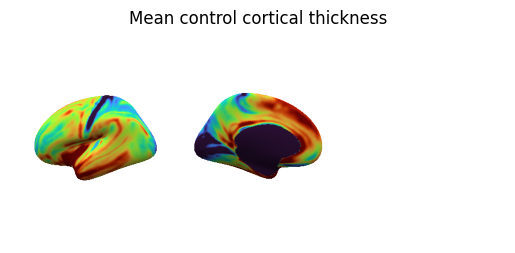

In [ ]:
#load mean white matter flair
image_path = './meld_workshop/data/img/thickness.png'
image = mpimg.imread(image_path)

# Display the image
plt.title("Mean control cortical thickness")
plt.imshow(image)
plt.axis('off')
#features have stereotyped patterns across individuals
#we z-score within subjects and then between subjects

#Normalising the surface-based features

This is the patients surface-based features after intra & intersubject normalisation

Can you see the lesion now?



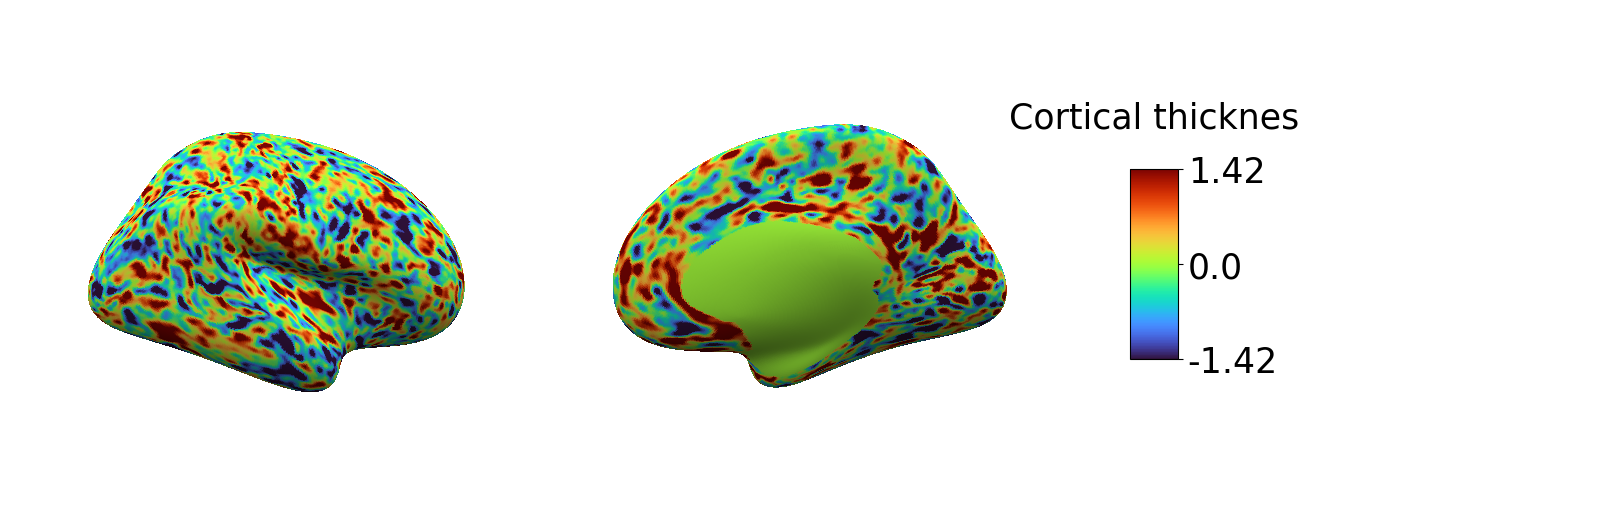

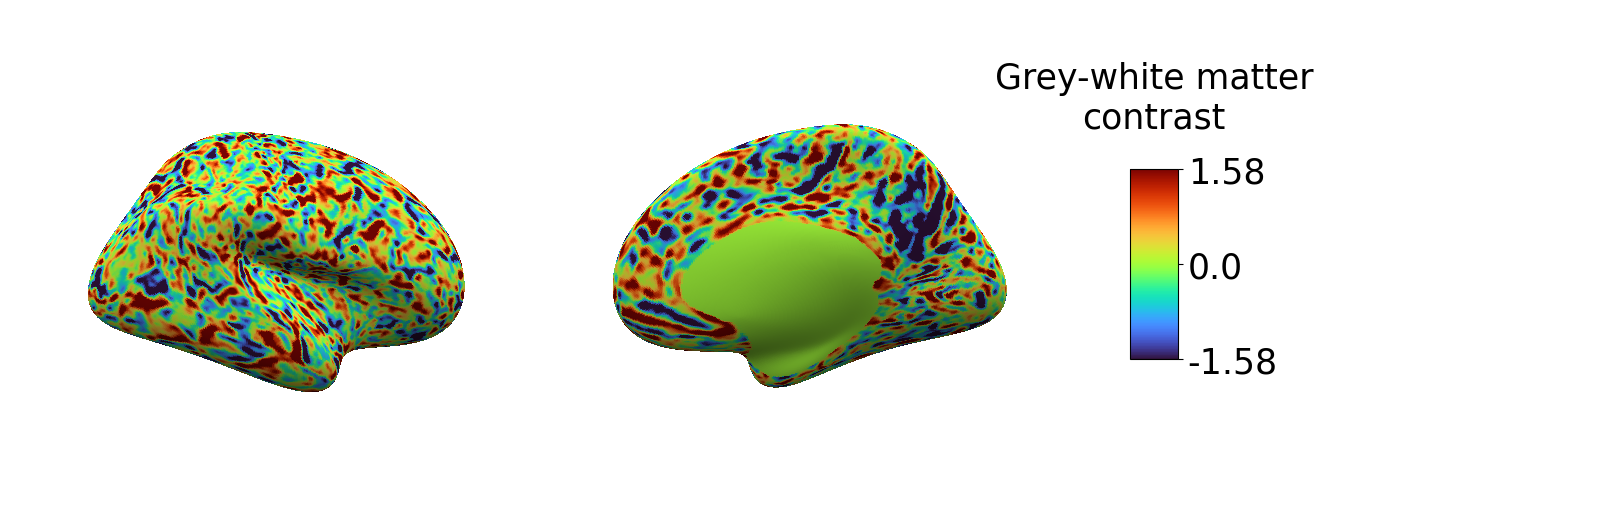

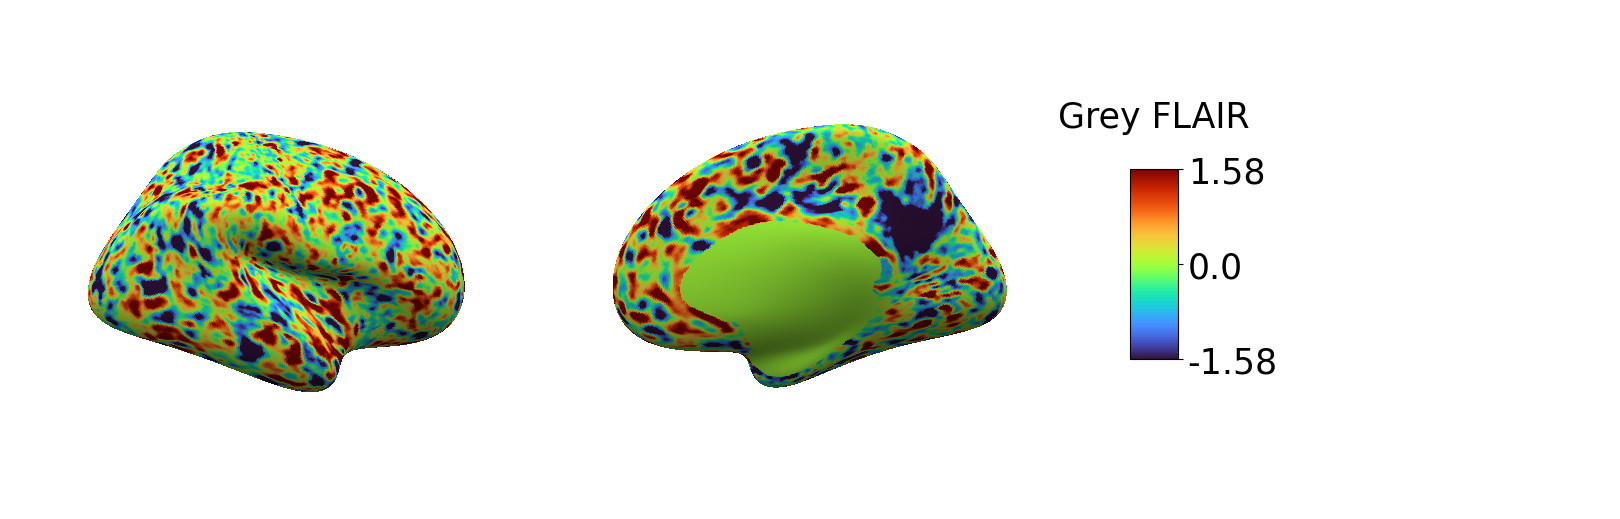

In [ ]:
feature_type =  '.inter_z.asym.intra_z.'
for feat_i in features:
  if 'pial' in feat_i:
      feat = f'{hemi}{feature_type}combat.on_lh.{feat_i}.mgh'
  else:
      feat = f'{hemi}{feature_type}combat.on_lh.{feat_i}.sm3.mgh'
  feature = nb.load(os.path.join(surf_folder,
                    feat)).get_fdata().ravel()

  msp.plot_surf(surf[0],surf[1],
                feature,vmin=-np.percentile(feature,95),rotate=[270,90],
                cmap_label=feature_names_dict[feat_i],
                vmax = np.percentile(feature,95),cmap='turbo')

#Q3. How confident are you about the lesion location after post-processing features?

1.   Absolutely no idea - I can't see a lesion
2.   Everything looks a bit abnormal
3.   One or two areas look suspicious
4.   I think I know where it is
5.   I am very confident I know where the lesion is

#Normalised features are input into the MELD Graph algorithm.

This is a graph convolutional neural network where different features are included as parallel channels for lesion segmentation.

As the features are on a surface rather than 2D or 3D, a spiral convolution is used.

Here is the architecture:

(-0.5, 1335.5, 699.5, -0.5)

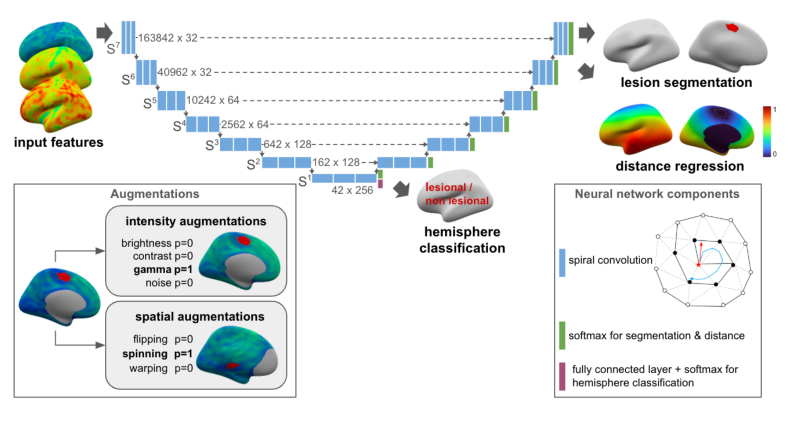

In [ ]:
image_path = './meld_workshop/data/img/eFigure1.png'
image = mpimg.imread(image_path)

# Display the image
fig,ax = plt.subplots(figsize=(10,6))
ax.imshow(image)
ax.axis('off')
#Features are included as parallel channels for lesion segmentation UNET.

#We can run our patients features through the MELD Graph algorithm and look at the prediction of where the lesion is

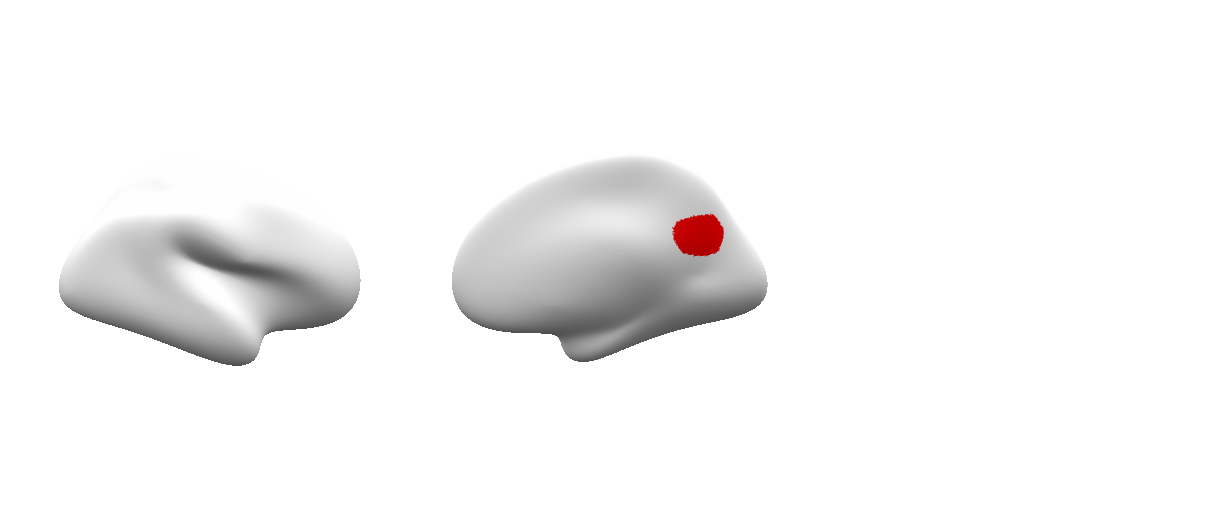

In [ ]:
#Load the output prediction from MELD Graph
prediction = nb.load(os.path.join(surf_folder,
                    f'{hemi}.on_lh.prediction.mgh')).get_fdata().ravel()

msp.plot_surf(surf[0],surf[1],
                prediction,rotate=[270,90],cmap='bwr',vmin=-1,vmax=1,colorbar=False)

#Predictions are wrapped into an interpretable report.

Here you can see:

A. The prediction on the inflated surface as well as mapped back onto the native T1.

B. How abnormal (z-score) each of the features were within the prediction and the colour is the saliency (how important that was to the network to make its prediction).

C. The T1 and FLAIR with a red box around the identified area.

(-0.5, 1516.5, 567.5, -0.5)

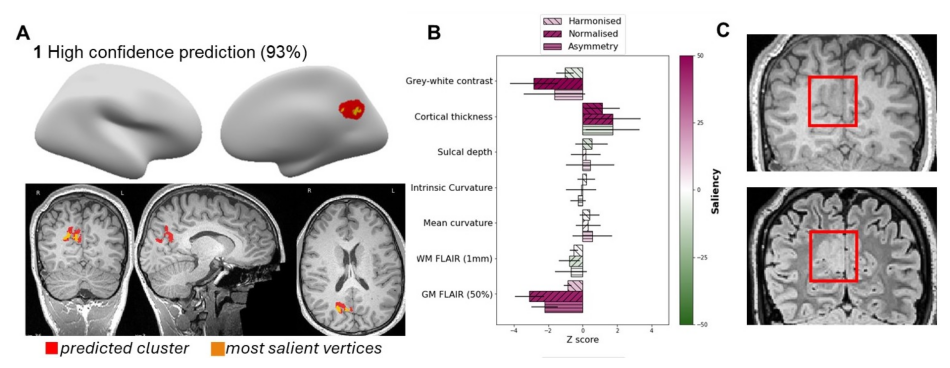

In [ ]:
image_path = './meld_workshop/data/img/Figure3.jpg'
image = mpimg.imread(image_path)

# Display the image
fig,ax = plt.subplots(figsize=(12,8))
ax.imshow(image)
ax.axis('off')

#Q4. How confident are you about the lesion location after the MELD Graph report?
1.   Absolutely no idea - I can't see a lesion
2.   Everything looks a bit abnormal
3.   One or two areas look suspicious
4.   I think I know where it is
5.   I am very confident I know where the lesion is

#Finally - view the manually created lesion mask drawn by an expert neuroradiologist to see the ground truth about where the FCD is.

You will need to uncomment the code to view this.

In [ ]:
#plot the lesion mask
#lesion_mask = nb.load(os.path.join(surf_folder,
#                    f'{hemi}.on_lh.lesion_mask.mgh')).get_fdata().ravel()

#msp.plot_surf(surf[0],surf[1],
#                lesion_mask,cmap='bwr',vmin=-1,vmax=1,colorbar=False)

Patient 00's lesion is easily visible once it has been pointed out. He had surgery to resect the lesion and became seizure free.

#Why not now try patient 01. This is a 23 year old male with drug-resistant focal epilepsy. When their MRI was reviewed by 30 raters none were able to find the lesion. It is a very subtle FCD and the type of patient where this technology could transform clinical care.